# Homework 12
## Using NetworkX

INFO 5871-001, Fall 2019
Robin Burke

## Imports

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline 
import urllib
import json
import pandas as pd
import seaborn as sns

## Load and show data

Network for the third Lord of the Rings movie. Courtesy of the website MovieGalaxies.com. Character-character projection of bipartite character-scene network created from movie scripts.

In [2]:
lotr3 = nx.read_graphml('lotr3.graphml')

Show the first three nodes with attributes. 

In [3]:
list(lotr3.nodes(data=True))[0:3]

[('3173474', {'label': 'GANDALF', 'GenderX': 'Male', 'Race': 'Wizard'}),
 ('3173334', {'label': 'SAM', 'GenderX': 'Male', 'Race': 'Hobbit'}),
 ('3173355', {'label': 'FRODO', 'GenderX': 'Male', 'Race': 'Hobbit'})]

Show the first three edges with labels

In [4]:
list(lotr3.edges(data=True))[0:3]

[('3173474',
  '3180709',
  {'Edge Id': '1033', 'Edge Label': '112510', 'weight': 1.0}),
 ('3173474',
  '3174733',
  {'Edge Id': '1037', 'Edge Label': '112429', 'weight': 2.0}),
 ('3173474',
  '3174453',
  {'Edge Id': '1040', 'Edge Label': '112517', 'weight': 1.0})]

### Basic drawing

NetworkX used a deprecated function in Matplotlib. This catches the annoying warning, which you can't fix.

//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


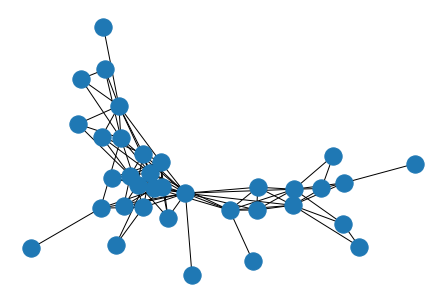

In [5]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
nx.draw(lotr3)

Using attributes to draw graph with labels. Note that NetworkX is not great for drawing

In [6]:
# Colors for different races
race_colors = { 'Human': 'brown',
                'Elf' : 'green',
                'Wizard' : 'white',
                'Hobbit' : 'lightblue',
                'Orc' : 'red',
                'Ent' : 'brown',
                'Undead' : 'grey',
                'Unknown' : 'maroon',
                'Dwarf' : 'yellow'}

node_cols = [race_colors[data['Race']]
              for node, data in lotr3.nodes(data=True)]

In [7]:
# Color edges by weight
edge_colmap = plt.get_cmap('Blues')
edge_wts = [data['weight'] for n1, n2, data in lotr3.edges(data=True)]
edge_vmax = max(edge_wts)

In [8]:
# Size nodes by weighted degree
wdge = lotr3.degree(weight='weight')
nsize = [wdge[node] * 10 for node in lotr3.nodes()]

In [9]:
# Label nodes by the "label" attribute
label_dict = { node: data['label'] for node, data in lotr3.nodes(data=True)}

//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


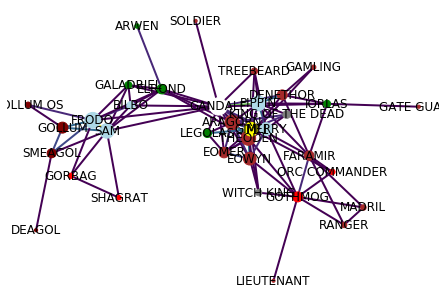

In [10]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

layout = nx.spring_layout(lotr3,k=0.4)
nx.draw(lotr3, labels=label_dict, pos=layout,
       node_color=node_cols,
       node_size=nsize, 
       egde_cmap=edge_colmap, edge_vin=0, edge_vmax=edge_vmax, 
       edge_color=edge_wts, width=2)

### Compute diameter

In [11]:
nx.diameter(lotr3)

6

## Create data frames of node and edge data

In [12]:
label_dict = {}
gender_dict = {}
type_dict = {}

for node, data in lotr3.nodes(data=True):
    label_dict[node] = data['label']
    gender_dict[node] = data['GenderX']
    type_dict[node] = data['Race']

char_df = pd.DataFrame({'Name': label_dict, 'Gender':gender_dict, 'Type':type_dict})
char_df.head()

,Name,Gender,Type
3173218,DEAGOL,Male,Unknown
3173224,SMEAGOL,Male,Unknown
3173306,GOLLUM,Male,Unknown
3173334,SAM,Male,Hobbit
3173355,FRODO,Male,Hobbit


In [13]:
weight_dict = {}
node1_dict = {}
node2_dict = {}

for node1, node2, data in lotr3.edges(data=True):
    edge_id = data['Edge Id']
    weight_dict[edge_id] = data['weight']
    node1_dict[edge_id] = node1
    node2_dict[edge_id] = node2

edge_df = pd.DataFrame({'Node1':node1_dict, 'Node2':node2_dict, 'Weight':weight_dict})
edge_df.head()

,Node1,Node2,Weight
1021,3174453,3173660,1.0
1022,3173660,3175487,2.0
1023,3173660,3173599,2.0
1024,3173479,3173660,3.0
1025,3173660,3173945,1.0


## Add degree and weighted degree information to the data frame

In [14]:
deg_dict = dict(lotr3.degree())
deg_series = pd.Series(deg_dict)
char_df['Degree'] = deg_series
char_df.head()

,Name,Gender,Type,Degree
3173218,DEAGOL,Male,Unknown,1
3173224,SMEAGOL,Male,Unknown,4
3173306,GOLLUM,Male,Unknown,4
3173334,SAM,Male,Hobbit,9
3173355,FRODO,Male,Hobbit,9


In [15]:
wdge_dict = dict(lotr3.degree(weight='weight'))
wdge_series = pd.Series(wdge_dict)
char_df['WDegree'] = wdge_series
char_df.head()

,Name,Gender,Type,Degree,WDegree
3173218,DEAGOL,Male,Unknown,1,1.0
3173224,SMEAGOL,Male,Unknown,4,8.0
3173306,GOLLUM,Male,Unknown,4,12.0
3173334,SAM,Male,Hobbit,9,21.0
3173355,FRODO,Male,Hobbit,9,25.0


## Fix Gollum data

There are three entries all of which correspond to the same individual: Gollum, Gollum OS (stands for Gollum Off-Screen), Smeagol. We are going merge these three characters into a single character Gollum, adding up the Degree and WDegree values, and removing the other entries. Another way to do this would have been to use the `contracted_nodes` function in NetworkX, but this function doesn't handle edge weights correctly.

Hint: The Degree for the merged Gollum character should be 10.

In [16]:
# Create a filter to get the three rows of interest
# Group by Degree and WDegree and sum the value for the three GOLLUM
# Drop the duplicates

In [17]:
gollum_filter = (char_df['Name'] == 'GOLLUM') | (char_df['Name'] == 'GOLLUM OS') | (char_df['Name'] == 'SMEAGOL')
char_df.loc[gollum_filter, 'Name'] = 'GOLLUM'
char_df['Degree'] = char_df.groupby(['Name'])['Degree'].transform('sum')
char_df['WDegree'] = char_df.groupby(['Name'])['WDegree'].transform('sum')
char_df_new = char_df.drop_duplicates(subset=['Name'])
char_df_new[char_df_new['Name'] == 'GOLLUM']

,Name,Gender,Type,Degree,WDegree
3173224,GOLLUM,Male,Unknown,10,23.0


### Note

This manipulation now renders the edge dataframe incorrect because it references nodes not present in the other data frame. We will skip fixing this here.

### Show the top 5 nodes by weighted degree

In [18]:
char_df_new.sort_values(by='WDegree', ascending=False)[0:5]

,Name,Gender,Type,Degree,WDegree
3173474,GANDALF,Male,Wizard,18,30.0
3173355,FRODO,Male,Hobbit,9,25.0
3173224,GOLLUM,Male,Unknown,10,23.0
3173462,PIPPIN,Male,Hobbit,9,22.0
3173591,THEODEN,Male,Human,11,21.0


## Plot the degree and weighted degree distributions

Set the x-ticks to whole numbers.

In [19]:
range(0, 18)

range(0, 18)

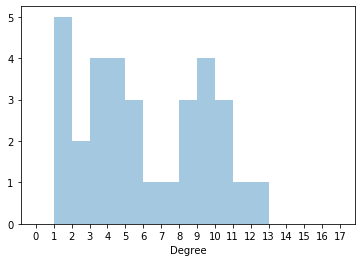

In [20]:
ax = sns.distplot(char_df_new['Degree'], bins=range(0,18), kde=False)
_ = ax.set_xticks(range(0,18))

Set the x-ticks to groups of 5

In [21]:
bins = [bin*5 for bin in range(0,10)]

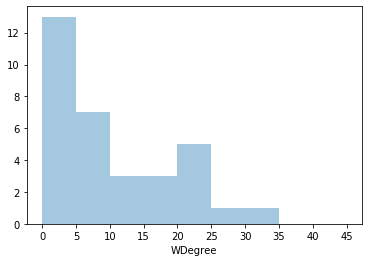

In [22]:
ax = sns.distplot(char_df_new['WDegree'], bins = bins, kde=False)
_ = ax.set_xticks(bins)

## Compare the networks

Load the LOTR1 network and create the corresponding data frame (nodes only, ignore edges). Add the `Degree` and `WDegree` columns as above.

In [23]:
lotr1 = nx.read_graphml('lotr1.graphml')

In [24]:
label_dict = {}
gender_dict = {}
type_dict = {}

for node, data in lotr1.nodes(data=True):
    label_dict[node] = data['label']
    gender_dict[node] = data['GenderX']
    type_dict[node] = data['Race']

char_df_lotr1 = pd.DataFrame({'Name': label_dict, 'Gender':gender_dict, 'Type':type_dict})

In [25]:
deg_dict = dict(lotr1.degree())
wdge_dict = dict(lotr1.degree(weight='weight'))
wdge_series = pd.Series(wdge_dict)
deg_series = pd.Series(deg_dict)
char_df_lotr1['Degree'] = deg_series
char_df_lotr1['WDegree'] = wdge_series
char_df_lotr1.head()

,Name,Gender,Type,Degree,WDegree
3166250,GALADRIEL,Female,Elf,8,9.0
3166472,GOLLUM,Male,Unknown,3,3.0
3166541,BILBO,Male,Hobbit,7,14.0
3166623,FRODO,Male,Hobbit,18,64.0
3166628,GANDALF,Male,Wizard,16,57.0


## Compute the number of male and female characters in each movie

Tolkien has often been criticized for his lack of female characters.

In [26]:
char_df_new.groupby('Gender').count()

,Name,Type,Degree,WDegree
Gender,,,,
Female,3,3,3,3
Male,30,30,30,30


In [27]:
char_df_lotr1.groupby('Gender').count()

,Name,Type,Degree,WDegree
Gender,,,,
Female,2,2,2,2
Male,22,22,22,22


## Create a new 'long' data frame

Include only the `Degree` and `WDegree` columns and add a new column for the movie.

In [28]:
char_df_new['Movie'] = 'Lotr2'
char_df_lotr1['Movie'] = 'Lotr1'

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
df = pd.concat([char_df_new, char_df_lotr1])

In [30]:
df = df.drop(['Name','Gender','Type'],axis=1)
df.head()

,Degree,WDegree,Movie
3173218,1,1.0,Lotr2
3173224,10,23.0,Lotr2
3173334,9,21.0,Lotr2
3173355,9,25.0,Lotr2
3173462,9,22.0,Lotr2


## Compare distributions

Use Seaborn violin plots to compare the degree and weighted degree distributions of the two movies.

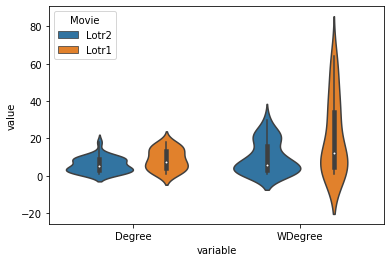

In [31]:
df = df.melt(value_vars=['Degree','WDegree'], id_vars='Movie')
ax = sns.violinplot(x='variable', y='value',hue='Movie', data=df)